In [1]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=10_000, noise=0.4)
(X, y)

(array([[ 0.23384895,  1.06965352],
        [ 0.28576888,  0.90990755],
        [ 0.82018642, -0.16283942],
        ...,
        [ 2.1874749 , -0.51631904],
        [ 0.31144738,  1.21834922],
        [ 0.06692013,  0.35653344]]),
 array([0, 0, 1, ..., 1, 0, 1]))

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

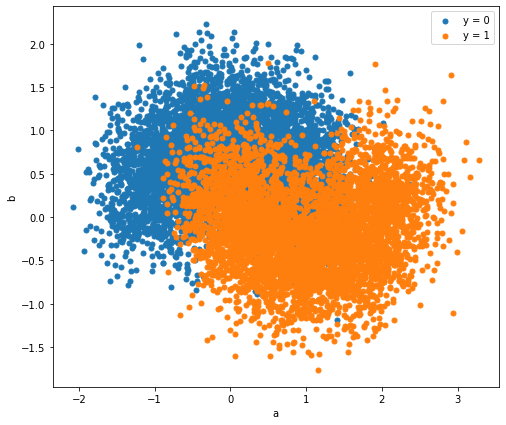

In [3]:
# https://kenyu-life.com/2019/08/28/sklearn_datasets/
a0, b0 = X[y==0,0], X[y==0,1]
a1, b1 = X[y==1,0], X[y==1,1]
 
plt.figure(figsize=(8, 7))
 
plt.scatter(a0, b0, marker='o', s=25, label="y = 0")
plt.scatter(a1, b1, marker='o', s=25, label="y = 1")
plt.legend()
plt.xlabel("a")
plt.ylabel("b")
plt.show()

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [6]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file="./moon_tree.dot",
    rounded=True,
    filled=True
)

In [7]:
!dot -Tpng moon_tree.dot -o moon_tree.png

In [8]:
param_grid = { 
  'min_samples_leaf': [5,10,25,50,100],
  'max_leaf_nodes': [5,10,50,100],
}

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(
  tree_clf,
  param_grid,
  cv=5,
)

In [10]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [5, 10, 50, 100],
                         'min_samples_leaf': [5, 10, 25, 50, 100]})

In [11]:
grid_search.best_params_

{'max_leaf_nodes': 50, 'min_samples_leaf': 100}

In [12]:
param_grid = { 
  'min_samples_leaf': [20,50,70],
  'max_leaf_nodes': [20,50,70],
  'max_depth': [5,10,50,100],
}

tree_clf = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(
  tree_clf,
  param_grid,
  cv=5,
)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 50, 100],
                         'max_leaf_nodes': [20, 50, 70],
                         'min_samples_leaf': [20, 50, 70]})

In [13]:
grid_search.best_params_

{'max_depth': 10, 'max_leaf_nodes': 20, 'min_samples_leaf': 70}

In [14]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=20, min_samples_leaf=70,
                       random_state=42)

In [15]:
tree_clf_all = DecisionTreeClassifier(max_depth=10, max_leaf_nodes=50, min_samples_leaf=50, random_state=42)
tree_clf_all.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=50, min_samples_leaf=50,
                       random_state=42)

In [16]:
test_predict = tree_clf_all.predict(X_test)
test_predict

array([1, 1, 0, ..., 0, 1, 1])

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, test_predict)

0.8475

In [18]:
import numpy as np
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-3, 4, -3, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap, zorder=10)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

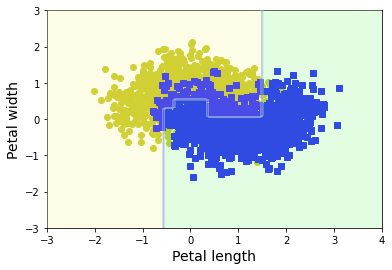

In [19]:
plot_decision_boundary(grid_search.best_estimator_, X_test, y_test, legend=False)

### 8

#### a

In [20]:
from sklearn.model_selection import ShuffleSplit

rs = ShuffleSplit(n_splits=1000, train_size=100, test_size=10, random_state=48)
X_gen = rs.split(X_train)
X_subsets = list(X_gen)

In [21]:
for train, test in X_subsets:
  print(len(train), len(test))

100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10
100 10

#### b

In [22]:
sub_1 = X_subsets[0]
sub_1

(array([2304,   34, 3021, 3892, 6806, 6154, 4608, 6720, 6096, 5874, 6990,
        5113, 1330, 7495, 6992, 6002, 3825, 3872, 6097, 4289,  539, 4431,
        1939, 7586, 4160, 4999, 7967, 3531, 6684, 7705, 1255, 1310, 7791,
        7439, 7489, 6700,  458, 2995, 1354, 5694,  117, 1373, 6072, 1991,
        4959, 1503, 6509,  771, 2416, 6711, 5492,  552, 5668, 6686, 5575,
        5923, 2007, 7951, 3363, 2592, 7634, 7336, 6993,  313, 4067, 2653,
        4502, 5593, 4196, 7080, 5808, 4579, 6656, 1241, 5967,  746, 6322,
        4359, 1610, 6557, 2715, 6255, 6003, 4268, 7365, 5338, 4694, 7287,
        7933,  436, 6759,  213, 3143, 5516, 4564, 5563, 6832,  725, 6623,
        4695]),
 array([  82, 7150, 4900, 2228, 4488, 7718, 3277, 6934, 3470, 3700]))

In [23]:
for idx in sub_1[0]:
  print(X_train[idx], y_train[idx])

[0.18705616 0.0022408 ] 1
[-1.10486517  0.33361871] 0
[ 0.50883219 -0.36513014] 1
[-0.66619308  1.08989509] 0
[ 2.02158877 -0.47691271] 1
[1.84886267 0.07635055] 1
[ 0.30358867 -0.96564408] 1
[0.24887015 0.90635198] 1
[0.80737152 0.96196866] 0
[-0.19795669  0.03583932] 1
[0.70703239 0.14125936] 1
[ 1.77158671 -0.70619977] 1
[0.31016125 0.86019286] 0
[-0.26016073  2.08986416] 0
[-0.78859686  1.11646565] 0
[-0.84394318  0.1947884 ] 0
[-0.97022913  0.57365287] 0
[ 2.27731761 -0.17407578] 1
[ 1.94558619 -0.43829947] 1
[-0.53789763 -0.11049742] 1
[ 0.36897783 -1.02168329] 1
[-1.24757856  0.47315535] 0
[ 1.49790293 -0.46428045] 0
[1.26964111 0.94826233] 0
[ 1.22256176 -1.12291058] 1
[ 0.9594019  -0.88819598] 1
[-0.56911815  0.83090278] 0
[ 1.3849609  -0.31521348] 1
[ 0.04790368 -0.0193017 ] 1
[ 0.72278577 -0.12230727] 1
[0.76165631 1.21054536] 0
[1.54420787 0.39104349] 1
[-0.12316517  0.89637345] 0
[-0.41947461  0.53309241] 0
[-0.40513855  0.19470292] 1
[2.5067103  0.20470176] 1
[-1.56501957

In [24]:
tree_clf = DecisionTreeClassifier(max_depth=10, max_leaf_nodes=50, min_samples_leaf=50, random_state=42)
tree_clf.fit(X_train[sub_1[0]], y_train[sub_1[0]])

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=50, min_samples_leaf=50,
                       random_state=42)

In [30]:
predict = tree_clf.predict(X_train[sub_1[1]])

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train[sub_1[1]], predict)

0.6

In [35]:
forest = []

for train_indices, test_indices in X_subsets:
  _X_train = X_train[train_indices]
  _y_train = y_train[train_indices]
  _X_test = X_train[test_indices]
  _y_test = y_train[test_indices]
  tree_clf = DecisionTreeClassifier(max_depth=10, max_leaf_nodes=50, min_samples_leaf=50, random_state=42)
  tree_clf.fit(_X_train, _y_train)
  forest.append((tree_clf, _X_test, _y_test))

In [36]:
scores = []

for tree, X_test, y_test in forest:
  predict = tree_clf.predict(X_test)
  score = accuracy_score(y_test, predict)
  scores.append(score)


In [37]:
scores

[0.6,
 0.9,
 0.7,
 0.5,
 0.9,
 0.9,
 0.7,
 0.8,
 0.9,
 0.9,
 0.7,
 0.8,
 0.7,
 0.7,
 0.7,
 0.7,
 0.7,
 0.8,
 1.0,
 1.0,
 0.8,
 0.7,
 0.7,
 0.7,
 0.8,
 0.7,
 0.9,
 0.6,
 0.9,
 0.7,
 0.8,
 0.9,
 0.7,
 0.9,
 0.8,
 0.6,
 0.9,
 0.8,
 0.8,
 0.9,
 1.0,
 0.7,
 0.5,
 0.9,
 0.9,
 0.5,
 0.9,
 0.9,
 0.8,
 0.8,
 0.7,
 1.0,
 0.6,
 1.0,
 0.4,
 0.7,
 0.8,
 0.9,
 0.9,
 0.8,
 0.6,
 0.9,
 0.8,
 0.8,
 0.9,
 0.5,
 0.9,
 0.6,
 0.9,
 0.9,
 0.8,
 0.8,
 0.7,
 0.6,
 0.8,
 0.8,
 0.7,
 0.6,
 0.7,
 0.8,
 1.0,
 0.8,
 0.8,
 0.8,
 0.9,
 0.8,
 0.8,
 0.7,
 0.8,
 0.6,
 0.9,
 0.8,
 0.8,
 1.0,
 0.7,
 0.7,
 0.7,
 0.8,
 0.5,
 0.8,
 0.8,
 0.9,
 0.6,
 0.8,
 0.8,
 0.7,
 1.0,
 0.9,
 0.8,
 0.7,
 0.8,
 0.6,
 0.8,
 0.5,
 0.8,
 1.0,
 0.8,
 0.6,
 1.0,
 1.0,
 0.8,
 0.7,
 0.8,
 0.5,
 0.8,
 0.7,
 0.6,
 0.7,
 0.9,
 0.4,
 0.8,
 0.6,
 0.8,
 0.5,
 0.8,
 0.6,
 0.7,
 0.9,
 0.8,
 0.9,
 0.7,
 0.7,
 0.7,
 0.7,
 0.7,
 0.7,
 0.6,
 0.6,
 0.9,
 0.8,
 0.8,
 0.5,
 0.8,
 0.8,
 0.9,
 0.9,
 0.5,
 0.8,
 1.0,
 0.9,
 0.7,
 0.6,
 0.6,
 1.0,
 0.7,
 0.7,
 0.6

#### c

In [87]:
result = []

for tree, _, _ in forest:
  predict = tree.predict(X_test)
  result.append(predict)

In [88]:
result = np.array(result)
result

array([[0, 1, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 0, 1],
       [1, 1, 0, ..., 1, 1, 1],
       ...,
       [1, 0, 0, ..., 1, 1, 1],
       [0, 1, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 0, 1]])

In [98]:
len(result), len(result[0])

(1000, 2000)

In [100]:
len(result.T)

2000

In [97]:
from scipy import stats

In [106]:
mode = stats.mode(result)
mode.mode

array([[0, 1, 0, ..., 0, 0, 1]])

In [107]:
len(y_test), len(mode.mode[0])

(2000, 2000)

In [109]:
accuracy_score(y_test, mode.mode[0])

0.766